In [1]:
%load_ext autoreload
%load_ext autotime

time: 180 µs (started: 2023-12-17 23:44:39 -08:00)


In [2]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings('ignore')

time: 454 µs (started: 2023-12-17 23:44:39 -08:00)


In [3]:
trace_path = '/usr/workspace/iopp/wisio_logs/darshan_dlp_overhead_1_40/overhead.darshan'

time: 321 µs (started: 2023-12-17 23:44:39 -08:00)


In [4]:
%autoreload 2

from wisio.cluster_management import load_cluster_config
from wisio.darshan import DarshanAnalyzer

cluster_config = load_cluster_config('cluster_config_local.yml')
cluster_config.local_dir = '/var/tmp/wisio-darshan-dlp'

analyzer = DarshanAnalyzer(
    checkpoint=False,
    checkpoint_dir='/usr/workspace/iopp/wisio_logs/_checkpoints/darshan_dlp_overhead_1_40',
    cluster_config=cluster_config,
    working_dir='.wisio/darshan_dlp_overhead_1_40',
    debug=False,
    output_type='console',
)

analyzer.cluster_manager.client.dashboard_link

[INFO] [23:44:42] Initializing Darshan analyzer [/g/g91/izzet/projects/wisio/wisio/analyzer.py:96]


'http://127.0.0.1:38177/status'

time: 4.08 s (started: 2023-12-17 23:44:40 -08:00)


In [5]:
%autoreload 2

result = analyzer.analyze_dxt(
    trace_path_pattern=trace_path, 
    metrics=['time'],
    # view_types=['proc_name'],
)

[INFO] [23:44:46] Read traces (0.5833429517224431) [/g/g91/izzet/projects/wisio/wisio/darshan.py:62]
[INFO] [23:44:46] Compute high-level metrics (0.9168833373114467) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:124]
[INFO] [23:44:47] Compute main view (0.8200923521071672) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:136]
[INFO] [23:44:47] Compute metric boundaries (0.056172666139900684) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:145]
[INFO] [23:44:52] Compute perspectives (4.335243101231754) [/g/g91/izzet/projects/wisio/wisio/analyzer.py:168]
/g/g91/izzet/projects/wisio/wisio/analysis.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf['bw_intensity'] = ddf['bw'] * ddf['intensity']
/g/g91/izzet/projects/wisio/wisio/analysis.py:70: S

time: 15.1 s (started: 2023-12-17 23:44:45 -08:00)


In [6]:
result.output.console(show_debug=True)

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  Job Time             6.00 seconds                                                                              │
│  I/O Time             0.75 seconds                                                                              │
│                       ├── Read - 0.72 seconds (95.91%)                                                          │
│                       ├── Write - 0.03 seconds (4.23%)                                                          │
│                       └── Metadata - 0.00 seconds (0.00%)                                                       │
│  I/O Ops              40,040 ops                                                                                │
│                       ├── Read - 40 ops (0.10%)                                                                 │
│                       ├── Write - 40,000 ops (99.90%)                                                           │
│                       └── Metadata - 0 ops (0.00%)                                                              │
│  I/O Size             5.00 GB                                                                                   │
│                       ├── Read - 0.12 GB (2.44%)                                                                │
│                       └── Write - 4.88 GB (97.56%)                                                              │
│  Read Xfer            4 MB - 40 ops                                                                             │
│                       └── 1-4 MB - 40 ops (100.00%)                                                             │
│  Write Xfer           256 KB - 1,719 ops                                                                        │
│                       └── 64-256 KB - 1,719 ops (100.00%)                                                       │
│  Node(s)              1 node(s)                                                                                 │
│                       └── localhost - 0.75 s (100.00%) - 0.12/4.88 GB R/W (2.44/97.56%) - 40,040 ops (100.00%)  │
│  App(s)               1 app(s)                                                                                  │
│                       └── app - 0.75 s (100.00%) - 0.12/4.88 GB R/W (2.44/97.56%) - 40,040 ops (100.00%)        │
│  Process(es)/Rank(s)  40 process(es)/rank(s)                                                                    │
│  Files                40 files                                                                                  │
│                       ├── Shared: 1 files (2.50%)                                                               │
│                       └── FPP: 39 files (97.50%)                                                                │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────── I/O Bottlenecks ────────────────────────────────────────────────╮
│  small_reads (85 bottlenecks)                                                                                   │
│  ├── file_name > file_pattern (1 bottlenecks)                                                                   │
│  │   └── 40 processes access 1 file pattern within 6 time periods and have an I/O time of 0.75 seconds which    │
│  │       is 100.00% of overall I/O time of the workload.                                                        │
│  │       ├── 'read' time is 95.91% (0.72 seconds) of I/O time.                                                  │
│  │       └── Average 'read's are 3.20 KB, which is smaller than 256 KB.                                         │
│  ├── file_name > file_dir (1 bottlenecks)             

time: 1.26 s (started: 2023-12-17 23:45:09 -08:00)


(<Figure size 500x500 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1554abf8e400>)

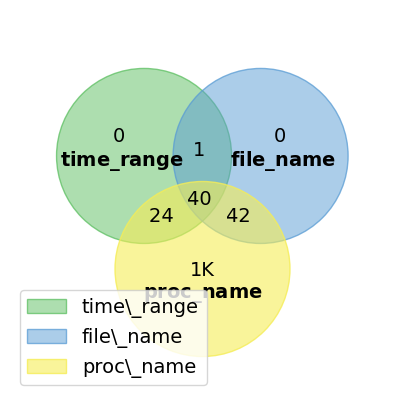

time: 344 ms (started: 2023-12-17 23:45:41 -08:00)


In [7]:
result.plots.view_relations3(
    metric='time',
    view_key1=('time_range',),
    view_key2=('file_name',),
    view_key3=('proc_name',),
)

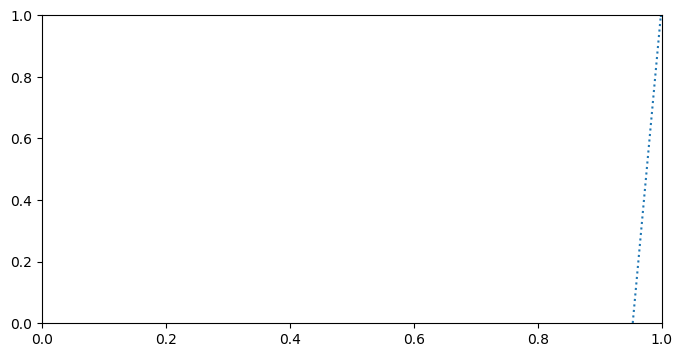

time: 226 ms (started: 2023-12-17 23:45:57 -08:00)


In [8]:
fig, ax = result.plots.slope(
    figsize=(8, 4),
    metric='time',
    view_keys=[('time_range',)],
)